<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Classification_27_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification exam of 27_01_2021

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
random_state = 42
np.random.seed(random_state)

## 1. Load the data from the file and show: the first few rows, the output of the .describe() function, the number of rows and columns

In [3]:
df = pd.read_csv("exam_2021_01_27.csv",header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [4]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [5]:
print("The shape of the data is:", df.shape)

The shape of the data is: (150, 5)


##2. Since the data contain nulls, eliminate the rows with nulls

In [6]:
df.dropna(inplace = True)

In [7]:
df.head()

,0,1,2,3,4
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0


##3. Since one of the predicting attributes is ordinal, it must be converted into numeric, you can use the OrdinalEncoder

In [8]:
enc = OrdinalEncoder(dtype = int)
df[2] = enc.fit_transform(df[2].values.reshape(-1,1))
df.head()
df

,0,1,2,3,4
4,5.0,3.6,0,0.2,0
7,5.0,3.4,0,0.2,0
10,5.4,3.7,0,0.2,0
11,4.8,3.4,0,0.2,0
13,4.3,3.0,0,0.1,0
...,...,...,...,...,...
145,6.7,3.0,3,2.3,2
146,6.3,2.5,3,1.9,2
147,6.5,3.0,3,2.0,2
148,6.2,3.4,3,2.3,2


## 4. Split the data into train and test

In [9]:
X = df.drop(4,axis = 1)
y = df[4]
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,train_size=0.7)

##5.  Model 1: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy 

I Choose DecisionTreeClassifier

In [10]:
criterions = ["gini","entropy"]

param_grid = {'max_depth': list(range(1,20)),"criterion":criterions}

dt = DecisionTreeClassifier(random_state=random_state)

dt_grid_searccv = GridSearchCV(dt,param_grid=param_grid,scoring="accuracy",cv =5)

dt_grid_searccv.fit(X_train,y_train)

dt_best = dt_grid_searccv.best_estimator_

y_pred = dt_best.predict(X_test)

## 6. Model 1: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

The accuracy on the test set is  94.59 %


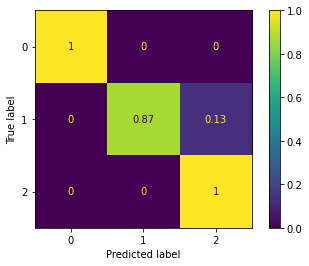

In [13]:
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
cfm = confusion_matrix(y_test,y_pred,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(dt_best,X_test,y_test,normalize="true");
'''from sklearn.metrics import precision_score
print("The precision is equal to :",precision_score(y_test, y_pred,average="micro"))
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix_ = pair_confusion_matrix(y_test,y_pred)
print(pair_confusion_matrix_)
print("The precision is:",pair_confusion_matrix_[0,0]/sum(pair_confusion_matrix_[:,0]))'''
print(disp)

## 7. Model 2: find and show the best hyperparameter setting with cross validation on the training set, optimise for the best accuracy 


Now I Choose KNN

In [14]:
knn = KNeighborsClassifier()

tuned_param_knn = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

model = GridSearchCV(estimator = knn, param_grid=tuned_param_knn, scoring = "accuracy")

model.fit(X_train,y_train)

knn = model.best_estimator_

y_pred = knn.predict(X_test)

##8. Model 2: show the accuracy of classification and the confusion matrix on the test set. For the confusion matrix use plot_confusion_matrix normalized in order to show for each class the precision (read carefully the documentation)

The accuracy on the test set is  89.19 %


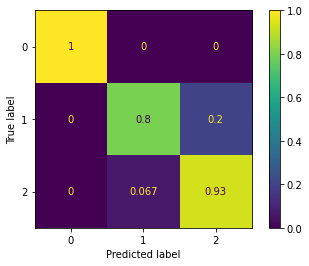

In [15]:
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
cfm = confusion_matrix(y_test,y_pred,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,normalize="true");
#disp = ConfusionMatrixDisplay(cfm)
'''from sklearn.metrics import precision_score
print("The precision is equal to :",precision_score(y_test, y_pred,average="micro"))
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix_ = pair_confusion_matrix(y_test,y_pred)
print(pair_confusion_matrix_)
print("The precision is:",pair_confusion_matrix_[0,0]/sum(pair_confusion_matrix_[:,0]))'''
print(disp)